## Notebook for Dental School Survey Analysis

## Data Load and Preprocess

1. Load Data into WORK.IMPORT. There are 157 rows and 23 columns.
2. Change Data from WORK.IMPORT to survey

Below are unnecessary
3. The data set survey has 157 rows/observations and 23 columns/variables. Print the whole data set out. 
4. List all variable names. Use 'order = VARNUM' to specify the list of variable is the same sequence as the data set instead of alphabetical listing.
5. Get the frequency table of variables

In [4]:
/*%web_drop_table(WORK.IMPORT);*/
FILENAME REFFILE '/folders/myfolders/DentalSchool/MasterTableSASInputProcessed.csv';
PROC IMPORT DATAFILE=REFFILE
    DBMS=CSV
    OUT=WORK.IMPORT;
    GETNAMES=YES;
RUN;
/*PROC CONTENTS DATA=WORK.IMPORT; RUN;*/
/*%web_open_table(WORK.IMPORT);*/

/* 2.*/
data survey;
set WORK.IMPORT;
run;

/* 3
proc print data=survey;
   title 'Dental School Survey Data';
run;
*/
/* 4. proc contents data= survey
order = VARNUM;
run;*/

/* 5. proc freq data=survey;
/*tables StudentType LoupesCompany Magnification  / out=FreqCount outexpect sparse;*/
/*table StudentType LoupesCompany Magnification LoupesOverallSatisfaction ScoreOnLoupesMagnification 
    ScoreOnLensQuality ScoreOnWidthDepthViewingField ScoreOnComfort ScoreOnLoupesWeight ScoreOnStyle 
    ScoreOnCustomerService ScoreOnSalesRepresentative
    ScoreOnCostRelatedValue HeadlightCompany HeadlightOverallSatisfaction ScoreOnLightIntensity 
    ScoreOnLightFieldWidth ScoreOnLightWeight ScoreOnBatteryLife ScoreOnBatteryRechargeSpeed
    ScoreOnBatterySizeWeight ScoreOnBatteryOnOffControl; 
title 'Frequency Tables';
run;*/

3. Based on Frequency table, conduct data preprocessing on specific variables <BR>
a. LoupesCompany: Lumadent -> NA <BR>
b. Magnification: 4.0x -> NA; 5.5x -> NA;  Variable 3X-4X-5X -> NA <BR>    
Double check of preprocessing. The data set is "survey1" after processing.<br>
a. Print all data in "surevey1".<br>
b. Print frequency table of "survey1".

4. Change Satisfactory scores from characters to numerical values. I append "N" in each variable. 
For example, LoupesOverallSatisfaction is a variable with characters. 
Its corresponding numerical variable is LoupesOverallSatisfactionN.
The new data set is "survey2" now.<BR>
I use survey3 to merge Student Types and find not necessary. I will use survey2 instead of survey3 for future analysis. <BR>    

In [5]:
data survey1;
set survey;
if LoupesCompany = "Lumadent" then LoupesCompany=" ";
if Magnification = "4.0x" then Magnification=" ";
if Magnification = "5.5x" then Magnification=" ";
if Magnification = "Variable 3X-4X-5X" then Magnification=" ";
run;

/*
proc print data=survey1;
   title 'Dental School Survey Data after Preprocessing';
run;
*/

/*
proc freq data=survey1;
table StudentType LoupesCompany Magnification LoupesOverallSatisfaction ScoreOnLoupesMagnification 
    ScoreOnLensQuality ScoreOnWidthDepthViewingField ScoreOnComfort ScoreOnLoupesWeight ScoreOnStyle 
    ScoreOnCustomerService ScoreOnSalesRepresentative
    ScoreOnCostRelatedValue HeadlightCompany HeadlightOverallSatisfaction ScoreOnLightIntensity 
    ScoreOnLightFieldWidth ScoreOnLightWeight ScoreOnBatteryLife ScoreOnBatteryRechargeSpeed
    ScoreOnBatterySizeWeight ScoreOnBatteryOnOffControl; 
title 'Frequency Tables of Data After Preprocessing';
run;
*/

data survey2;
set survey1;

/* Overall satisfaction for headlight and loupes*/
if LoupesOverallSatisfaction = "Somewhat dissatisfied" then LoupesOverallSatisfactionN = 2 ;
if LoupesOverallSatisfaction = "Neither satisfied/Nor dissatisfied" then LoupesOverallSatisfactionN = 3 ;
if LoupesOverallSatisfaction = "Somewhat satisfied" then LoupesOverallSatisfactionN = 4 ;
if LoupesOverallSatisfaction = "Very satisfied" then LoupesOverallSatisfactionN = 5 ;

if HeadlightOverallSatisfaction = "Somewhat dissatisfied" then HeadlightOverallSatisfactionN = 2 ;
if HeadlightOverallSatisfaction = "Neither satisfied/Nor dissatisfied" then HeadlightOverallSatisfactionN = 3 ;
if HeadlightOverallSatisfaction = "Somewhat satisfied" then HeadlightOverallSatisfactionN = 4 ;
if HeadlightOverallSatisfaction = "Very satisfied" then HeadlightOverallSatisfactionN = 5 ;

/* Specific satisfaction for loupes */
if ScoreOnLoupesMagnification = "Very unsatisfied" then ScoreOnLoupesMagnificationN = 1 ;
if ScoreOnLoupesMagnification = "Unsatisfied" then ScoreOnLoupesMagnificationN = 2 ;
if ScoreOnLoupesMagnification = "Neuteral" then ScoreOnLoupesMagnificationN = 3 ;
if ScoreOnLoupesMagnification = "Satisfied" then ScoreOnLoupesMagnificationN = 4 ;
if ScoreOnLoupesMagnification = "Very satisfied" then ScoreOnLoupesMagnificationN = 5 ;

if ScoreOnLensQuality = "Very unsatisfied" then ScoreOnLensQualityN = 1 ;
if ScoreOnLensQuality = "Unsatisfied" then ScoreOnLensQualityN = 2 ;
if ScoreOnLensQuality = "Neuteral" then ScoreOnLensQualityN = 3 ;
if ScoreOnLensQuality = "Satisfied" then ScoreOnLensQualityN = 4 ;
if ScoreOnLensQuality = "Very satisfied" then ScoreOnLensQualityN = 5 ;

if ScoreOnWidthDepthViewingField = "Very unsatisfied" then ScoreOnWidthDepthViewingFieldN = 1 ;
if ScoreOnWidthDepthViewingField = "Unsatisfied" then ScoreOnWidthDepthViewingFieldN = 2 ;
if ScoreOnWidthDepthViewingField = "Neuteral" then ScoreOnWidthDepthViewingFieldN = 3 ;
if ScoreOnWidthDepthViewingField = "Satisfied" then ScoreOnWidthDepthViewingFieldN = 4 ;
if ScoreOnWidthDepthViewingField = "Very satisfied" then ScoreOnWidthDepthViewingFieldN = 5 ;

if ScoreOnComfort = "Very unsatisfied" then ScoreOnComfortN = 1 ;
if ScoreOnComfort = "Unsatisfied" then ScoreOnComfortN = 2 ;
if ScoreOnComfort = "Neuteral" then ScoreOnComfortN = 3 ;
if ScoreOnComfort = "Satisfied" then ScoreOnComfortN = 4 ;
if ScoreOnComfort = "Very satisfied" then ScoreOnComfortN = 5 ;

if ScoreOnLoupesWeight = "Very unsatisfied" then ScoreOnLoupesWeightN = 1 ;
if ScoreOnLoupesWeight = "Unsatisfied" then ScoreOnLoupesWeightN = 2 ;
if ScoreOnLoupesWeight = "Neuteral" then ScoreOnLoupesWeightN = 3 ;
if ScoreOnLoupesWeight = "Satisfied" then ScoreOnLoupesWeightN = 4 ;
if ScoreOnLoupesWeight = "Very satisfied" then ScoreOnLoupesWeightN = 5 ;

if ScoreOnStyle = "Very unsatisfied" then ScoreOnStyleN = 1 ;
if ScoreOnStyle = "Unsatisfied" then ScoreOnStyleN = 2 ;
if ScoreOnStyle = "Neuteral" then ScoreOnStyleN = 3 ;
if ScoreOnStyle = "Satisfied" then ScoreOnStyleN = 4 ;
if ScoreOnStyle = "Very satisfied" then ScoreOnStyleN = 5 ;

if ScoreOnCustomerService = "Very unsatisfied" then ScoreOnCustomerServiceN = 1 ;
if ScoreOnCustomerService = "Unsatisfied" then ScoreOnCustomerServiceN = 2 ;
if ScoreOnCustomerService = "Neuteral" then ScoreOnCustomerServiceN = 3 ;
if ScoreOnCustomerService = "Satisfied" then ScoreOnCustomerServiceN = 4 ;
if ScoreOnCustomerService = "Very satisfied" then ScoreOnCustomerServiceN = 5 ;

if ScoreOnSalesRepresentative = "Very unsatisfied" then ScoreOnSalesRepresentativeN = 1 ;
if ScoreOnSalesRepresentative = "Unsatisfied" then ScoreOnSalesRepresentativeN = 2 ;
if ScoreOnSalesRepresentative = "Neuteral" then ScoreOnSalesRepresentativeN = 3 ;
if ScoreOnSalesRepresentative = "Satisfied" then ScoreOnSalesRepresentativeN = 4 ;
if ScoreOnSalesRepresentative = "Very satisfied" then ScoreOnSalesRepresentativeN = 5 ;

if ScoreOnCostRelatedValue = "Very unsatisfied" then ScoreOnCostRelatedValueN = 1 ;
if ScoreOnCostRelatedValue = "Unsatisfied" then ScoreOnCostRelatedValueN = 2 ;
if ScoreOnCostRelatedValue = "Neuteral" then ScoreOnCostRelatedValueN = 3 ;
if ScoreOnCostRelatedValue = "Satisfied" then ScoreOnCostRelatedValueN = 4 ;
if ScoreOnCostRelatedValue = "Very satisfied" then ScoreOnCostRelatedValueN = 5 ;

/* Specific satisfaction for headlight */
if ScoreOnLightIntensity = "Very unsatisfied" then ScoreOnLightIntensityN = 1 ;
if ScoreOnLightIntensity = "Unsatisfied" then ScoreOnLightIntensityN = 2 ;
if ScoreOnLightIntensity = "Neuteral" then ScoreOnLightIntensityN = 3 ;
if ScoreOnLightIntensity = "Satisfied" then ScoreOnLightIntensityN = 4 ;
if ScoreOnLightIntensity = "Very satisfied" then ScoreOnLightIntensityN = 5 ;

if ScoreOnLightFieldWidth = "Very unsatisfied" then ScoreOnLightFieldWidthN = 1 ;
if ScoreOnLightFieldWidth = "Unsatisfied" then ScoreOnLightFieldWidthN = 2 ;
if ScoreOnLightFieldWidth = "Neuteral" then ScoreOnLightFieldWidthN = 3 ;
if ScoreOnLightFieldWidth = "Satisfied" then ScoreOnLightFieldWidthN = 4 ;
if ScoreOnLightFieldWidth = "Very satisfied" then ScoreOnLightFieldWidthN = 5 ;

if ScoreOnLightWeight = "Very unsatisfied" then ScoreOnLightWeightN = 1 ;
if ScoreOnLightWeight = "Unsatisfied" then ScoreOnLightWeightN = 2 ;
if ScoreOnLightWeight = "Neuteral" then ScoreOnLightWeightN = 3 ;
if ScoreOnLightWeight = "Satisfied" then ScoreOnLightWeightN = 4 ;
if ScoreOnLightWeight = "Very satisfied" then ScoreOnLightWeightN = 5 ;

if ScoreOnBatteryLife = "Very unsatisfied" then ScoreOnBatteryLifeN = 1 ;
if ScoreOnBatteryLife = "Unsatisfied" then ScoreOnBatteryLifeN = 2 ;
if ScoreOnBatteryLife = "Neuteral" then ScoreOnBatteryLifeN = 3 ;
if ScoreOnBatteryLife = "Satisfied" then ScoreOnBatteryLifeN = 4 ;
if ScoreOnBatteryLife = "Very satisfied" then ScoreOnBatteryLifeN = 5 ;

if ScoreOnBatteryRechargeSpeed = "Very unsatisfied" then ScoreOnBatteryRechargeSpeedN = 1 ;
if ScoreOnBatteryRechargeSpeed = "Unsatisfied" then ScoreOnBatteryRechargeSpeedN = 2 ;
if ScoreOnBatteryRechargeSpeed = "Neuteral" then ScoreOnBatteryRechargeSpeedN = 3 ;
if ScoreOnBatteryRechargeSpeed = "Satisfied" then ScoreOnBatteryRechargeSpeedN = 4 ;
if ScoreOnBatteryRechargeSpeed = "Very satisfied" then ScoreOnBatteryRechargeSpeedN = 5 ;

if ScoreOnBatterySizeWeight = "Very unsatisfied" then ScoreOnBatterySizeWeightN = 1 ;
if ScoreOnBatterySizeWeight = "Unsatisfied" then ScoreOnBatterySizeWeightN = 2 ;
if ScoreOnBatterySizeWeight = "Neuteral" then ScoreOnBatterySizeWeightN = 3 ;
if ScoreOnBatterySizeWeight = "Satisfied" then ScoreOnBatterySizeWeightN = 4 ;
if ScoreOnBatterySizeWeight = "Very satisfied" then ScoreOnBatterySizeWeightN = 5 ;

if ScoreOnBatteryOnOffControl = "Very unsatisfied" then ScoreOnBatteryOnOffControlN = 1 ;
if ScoreOnBatteryOnOffControl = "Unsatisfied" then ScoreOnBatteryOnOffControlN = 2 ;
if ScoreOnBatteryOnOffControl = "Neuteral" then ScoreOnBatteryOnOffControlN = 3 ;
if ScoreOnBatteryOnOffControl = "Satisfied" then ScoreOnBatteryOnOffControlN = 4 ;
if ScoreOnBatteryOnOffControl = "Very satisfied" then ScoreOnBatteryOnOffControlN = 5 ;
run;

data survey3;
set survey2;
StudentTypeMerged=0;
if StudentType="DH4" then StudentTypeMerged=1;
run;

# Correlation Studies


1. Correlations between loupes satisfaction scores<BR>
2. Correlations between headlight satisfaction scores<BR>

In [14]:
proc corr data=survey2;
var LoupesOverallSatisfactionN ScoreOnLoupesMagnificationN 
ScoreOnLensQualityN ScoreOnWidthDepthViewingFieldN ScoreOnComfortN 
ScoreOnLoupesWeightN ScoreOnStyleN ScoreOnCustomerServiceN 
ScoreOnSalesRepresentativeN ScoreOnCostRelatedValueN; 
title 'Correlations between loupes satisfaction scores';
run;

In [56]:
proc corr data=survey2;
var HeadlightOverallSatisfactionN 
ScoreOnLightIntensityN ScoreOnLightFieldWidthN ScoreOnLightWeightN 
ScoreOnBatteryLifeN ScoreOnBatteryRechargeSpeedN ScoreOnBatterySizeWeightN 
ScoreOnBatteryOnOffControlN;
title 'Correlations between headlight satisfaction scores';
run;

## Analysis of Overall Satisfaction Scores. <br> 
1. Determine whether StudentType and LoupesCompany can "significantly" influence the satisfaction with loupes. <br> 
2. Determine whether StudentType and HeadlightCompany can "significantly" influence the satisfaction with headlights. 

#### Ordered Categorical Modeling

In [18]:
proc glimmix data=survey2;
class StudentType LoupesCompany;
model LoupesOverallSatisfactionN (order=internal) = StudentType LoupesCompany/htype=1,3 dist=multinomial link=cumligit s;
output out=outpred pred=p;
title "Effects of Student Types and Loupes Companies on Overall Loupes Satisfaction Scores";
run;
/*proc print data=outpred;
run;*/


In [21]:
proc glimmix data=survey2;
class StudentType HeadlightCompany;
model HeadlightOverallSatisfactionN (order=internal) = StudentType HeadlightCompany/htype=1,3 dist=multinomial link=cumligit s;
/*output out=outpred pred=p;*/
title "Effects of Student Types and Headlight Companies on Overall Headlight Satisfaction Scores";
run;

## Alternative analysis: Glm modeling treating satisfaction scores as numeric values


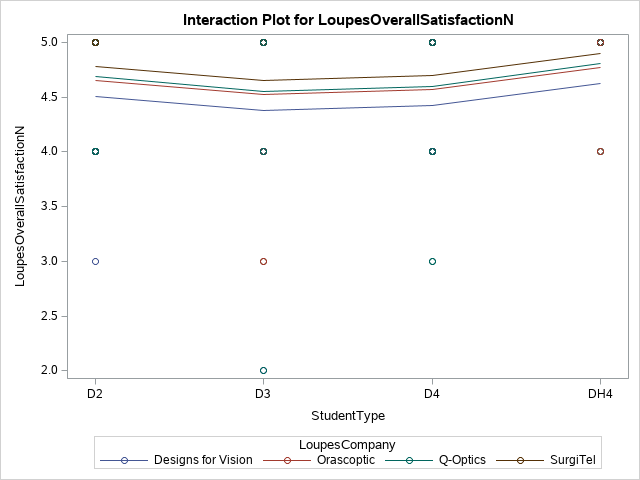
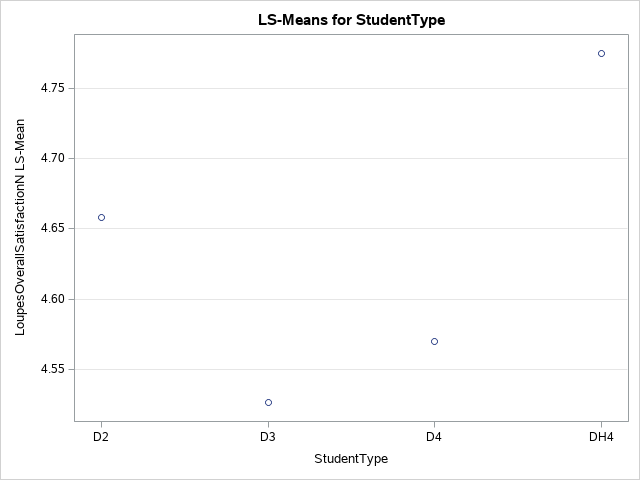
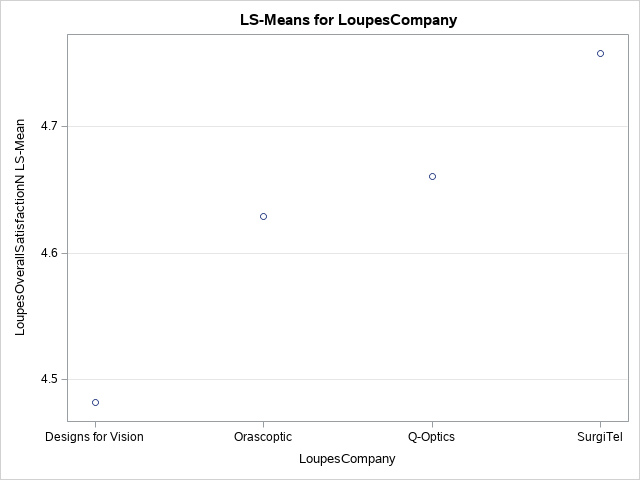

In [25]:
proc glm data = survey2;
   class StudentType LoupesCompany;
   model LoupesOverallSatisfactionN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ;  /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany; /* /pdiff=all adjust=tukey;*/
   title "Effects of Student Types and Loupes Companies on Overall Loupes Satisfaction Scores";
run;


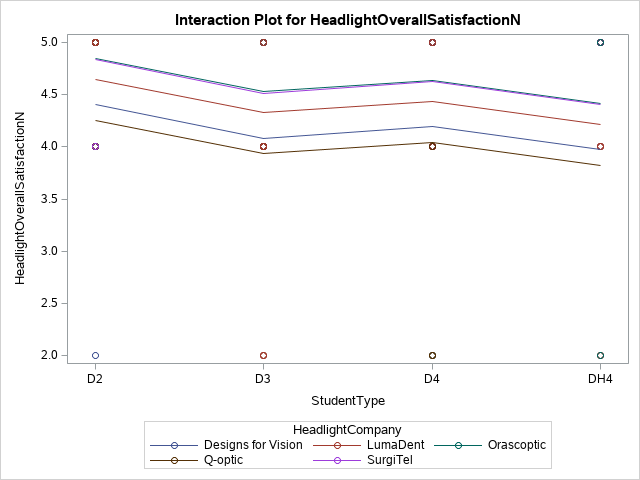
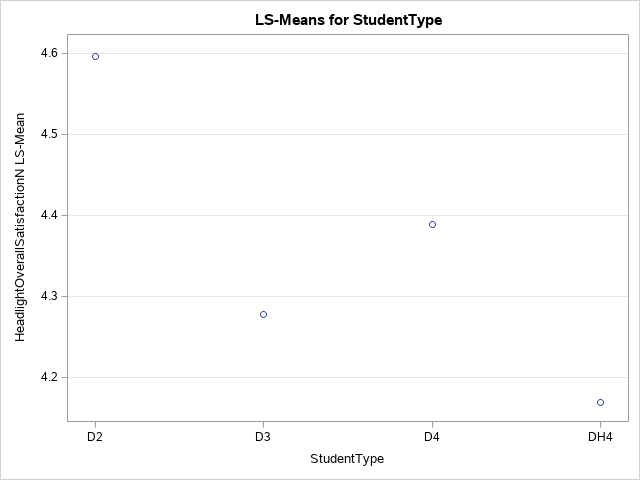
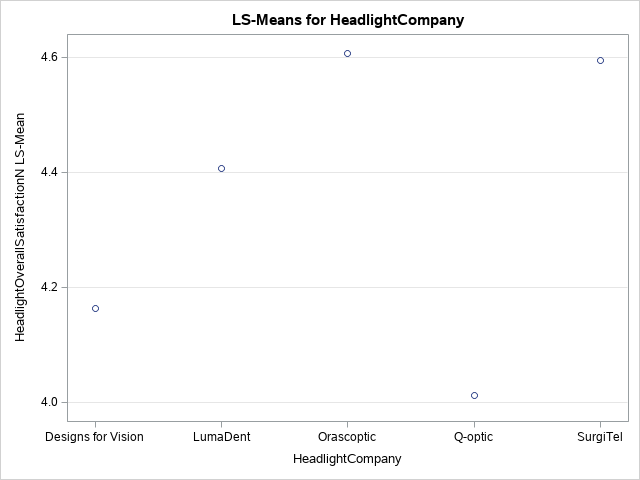

In [27]:
proc glm data = survey2;
   class StudentType HeadlightCompany;
   model HeadlightOverallSatisfactionN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ;  /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany; /* /pdiff=all adjust=tukey;*/
   title "Effects of Student Types and Loupes Companies on Overall Headlight Satisfaction Scores";
run;

## Analysis of Specific Satisfaction Scores. <br> 
1. Determine whether StudentType and LoupesCompany can "significantly" influence nine satisfaction with loupes. <br> 
2. Determine whether StudentType and HeadlightCompany can "significantly" influence seven satisfaction with headlights. 

#### Alternative analysis by GLM treating satisfaction scores as numerical values

#### Nine specific satisfacion scores on Loupes with respect to student types and loupes companies.<BR>
We found the corresponding p values are <BR>
(first p value is for Stuent type and the second p value is for company)<br>
ScoreOnLoupesMagnification (0.0009, 0.0451); <BR>
ScoreOnLensQuality (0.0607, 0.0439); <BR>
ScoreOnWidthDepthViewingField (0.2114, 0.0061); <BR>
ScoreOnComfort (0.8179, 0.1561); <BR>
ScoreOnLoupesWeight (0.1676, 0.0002); <BR>
ScoreOnStyle (0.0051, 0.1442); <BR>
ScoreOnCustomerService (0.0793, 0.0002); <BR>
ScoreOnSalesRepresentative (0.0135, 0.0001); <BR>
ScoreOnCostRelatedValue (0.0066, 0.3184); <BR>

#### Seven specific satisfacion scores on Headlights with respect to student types and headlight companies simultaneously.<BR>
We found the corresponding p values are: (first p value is for Stuent type and the second p value is for company) <BR>
ScoreOnLightIntensity (0.0072, 0.0162) ; <BR>
ScoreOnLightFieldWidth (0.0185, 0.0681); <BR>
ScoreOnLightWeight (0.6837, 0.4750); <BR>
ScoreOnBatteryLife (0.9435, 0.0001);<BR>
ScoreOnBatteryRechargeSpeed (0.7261, 0.0001); <BR>
ScoreOnBatterySizeWeight (0.0681, 0.5109); <BR>
ScoreOnBatteryOnOffControl (0.1742, 0.5826); <BR>


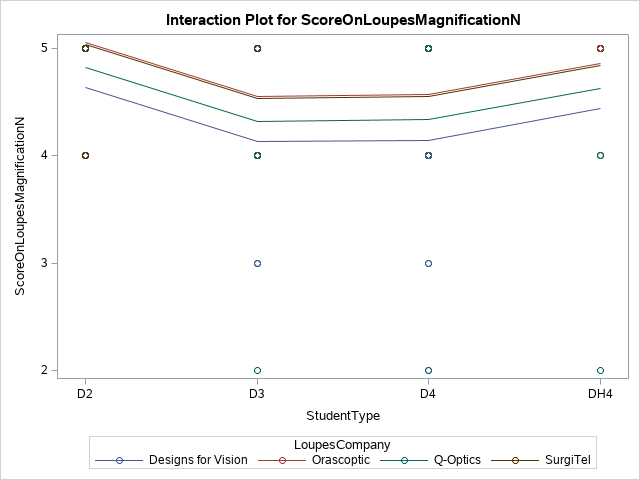
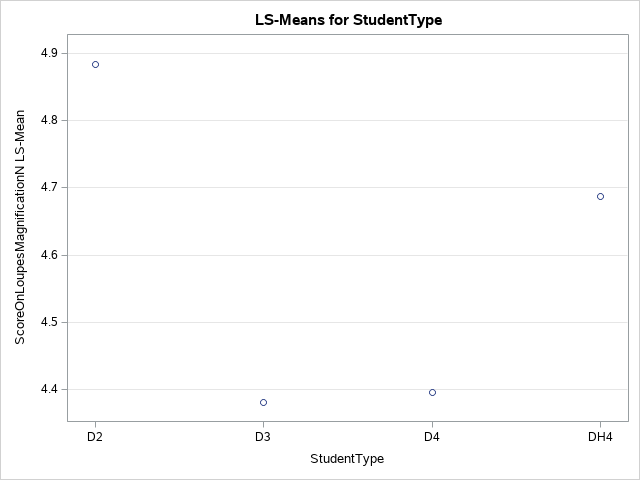
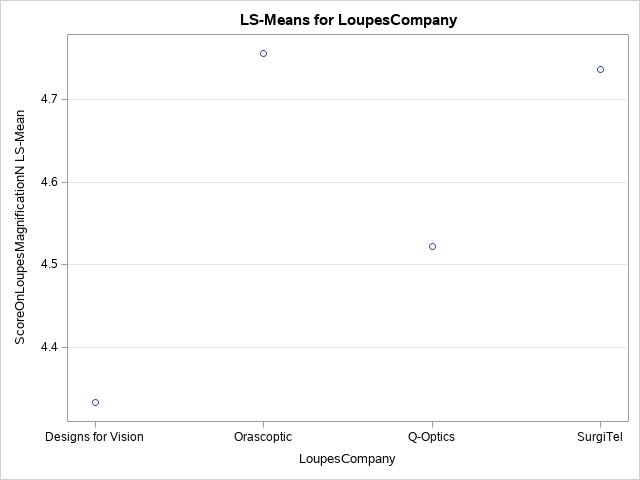
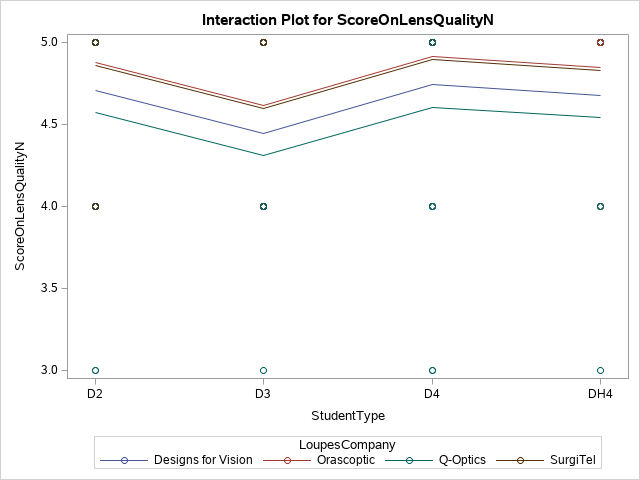
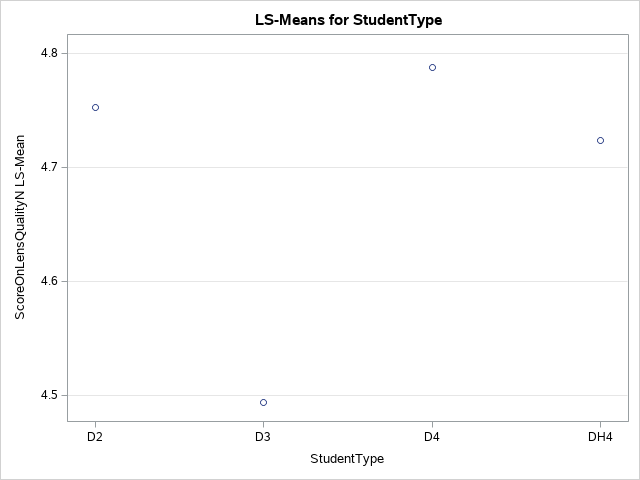
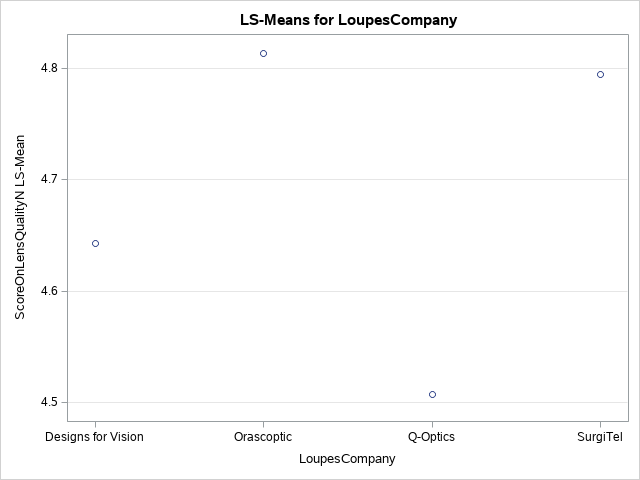
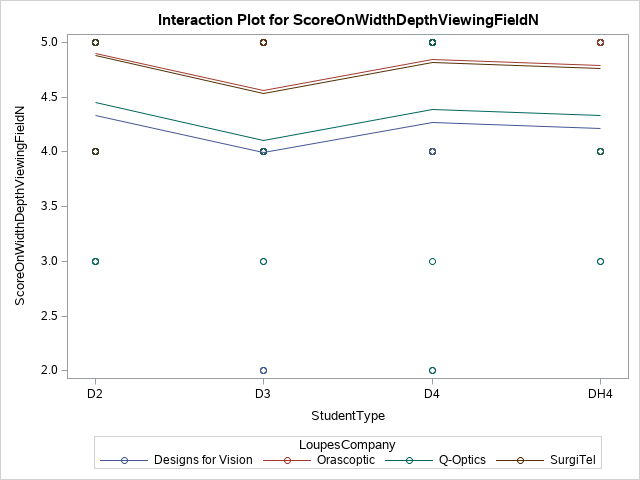
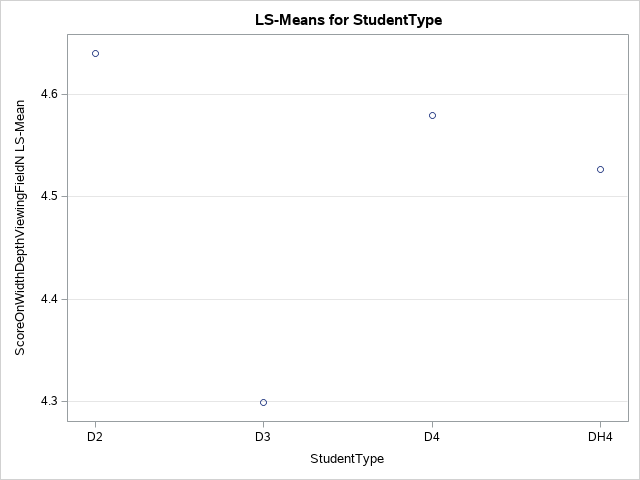
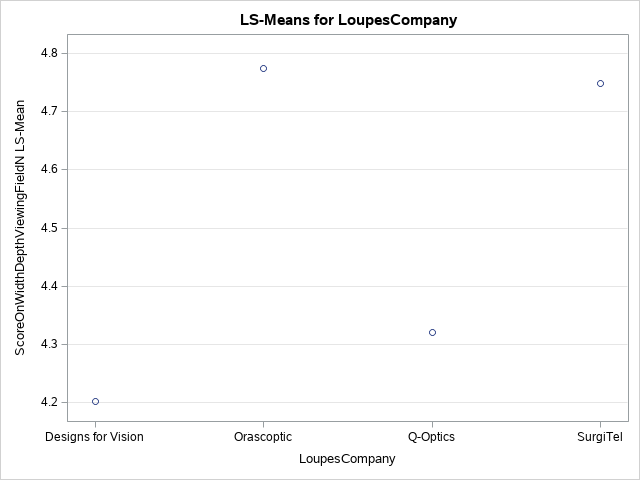
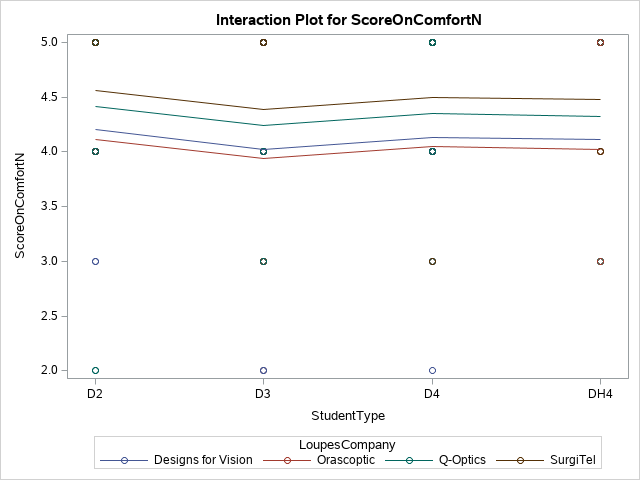
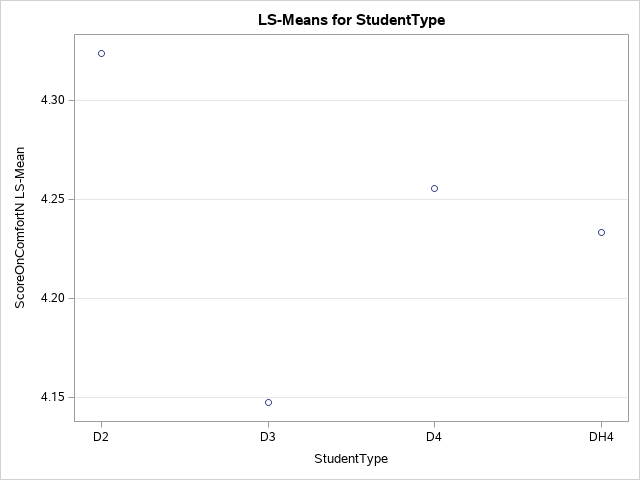
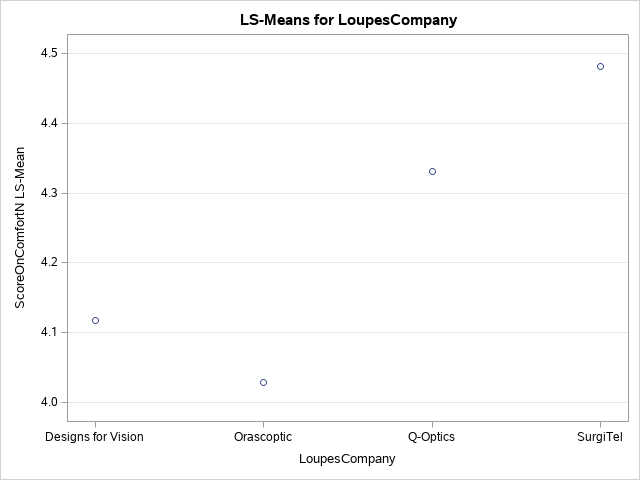
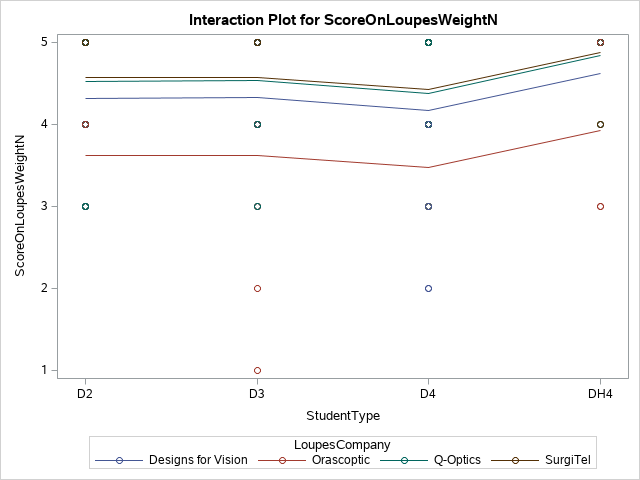
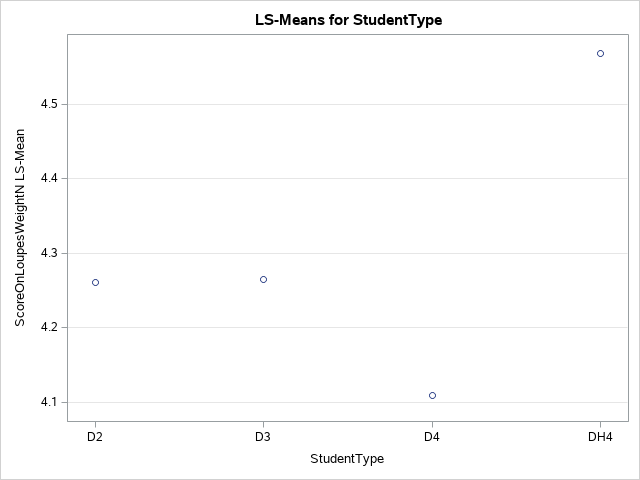
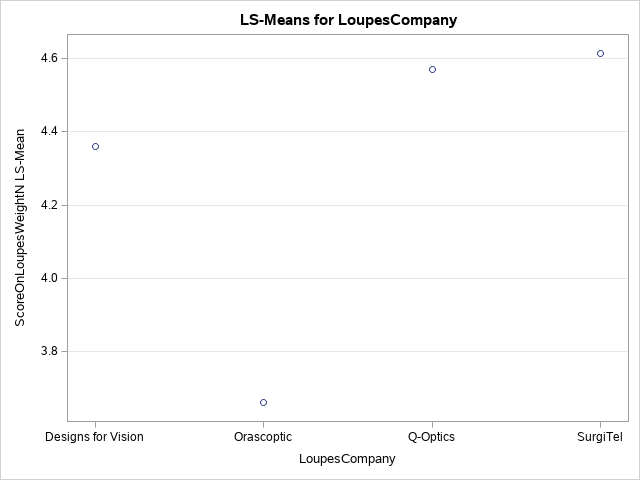
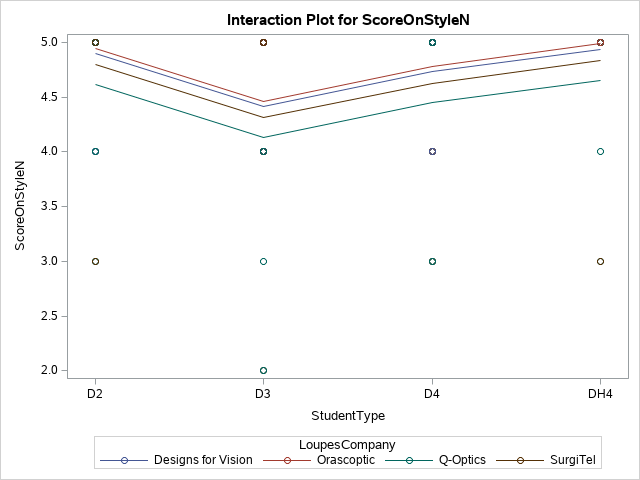
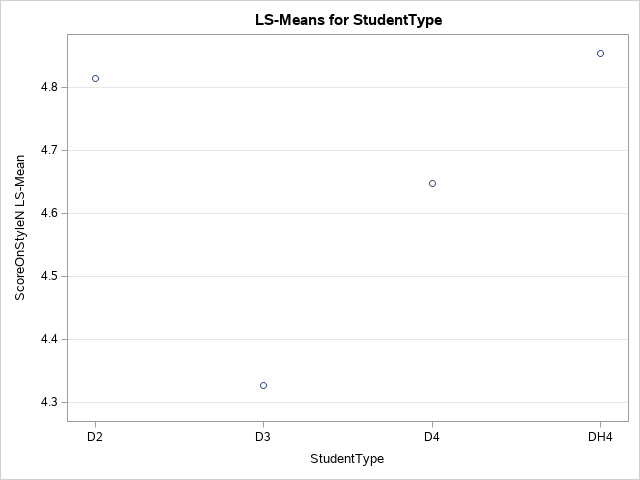
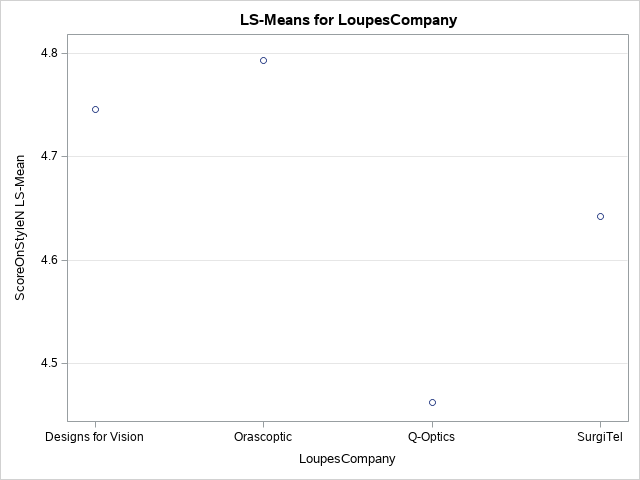
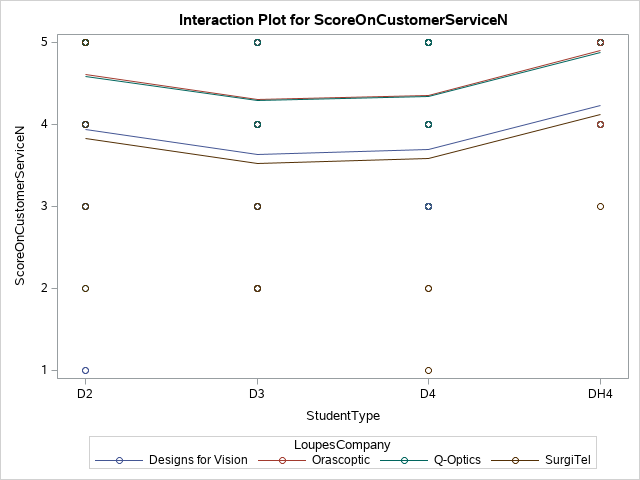
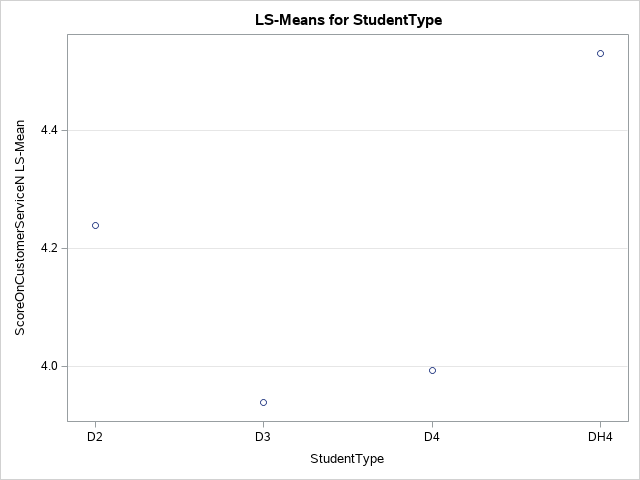
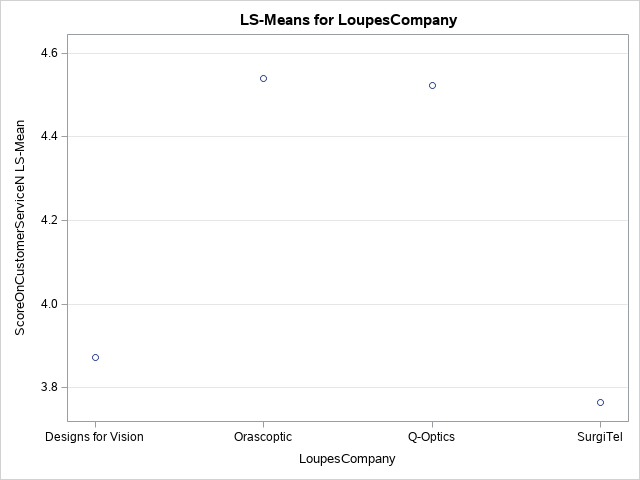
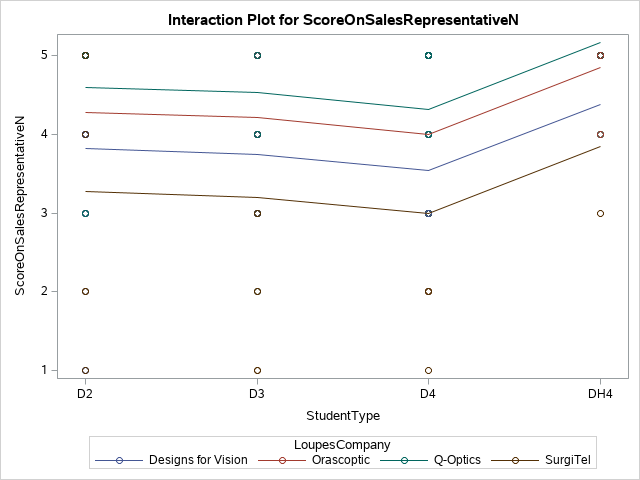
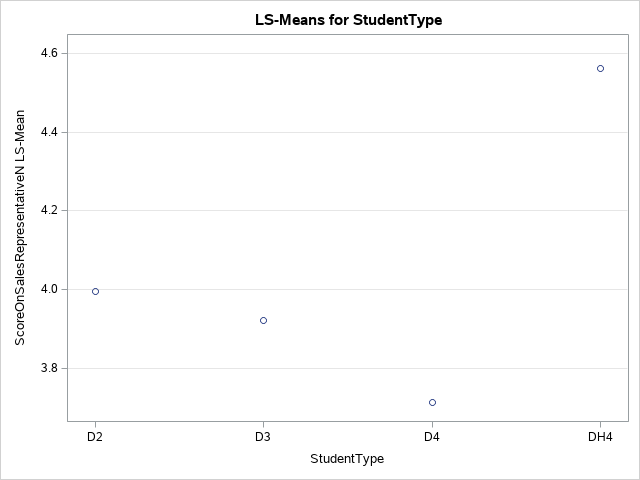
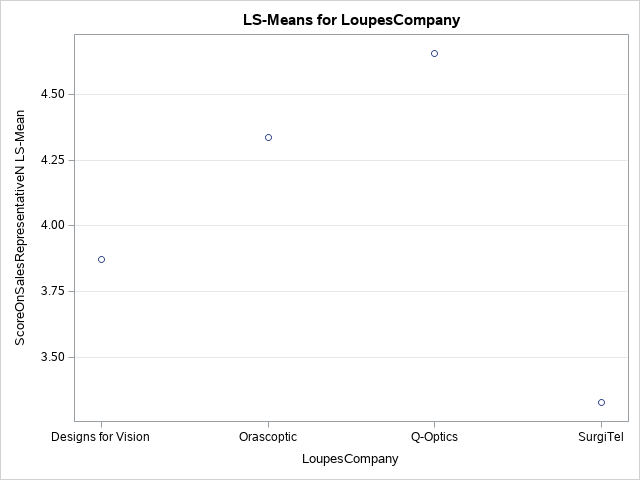
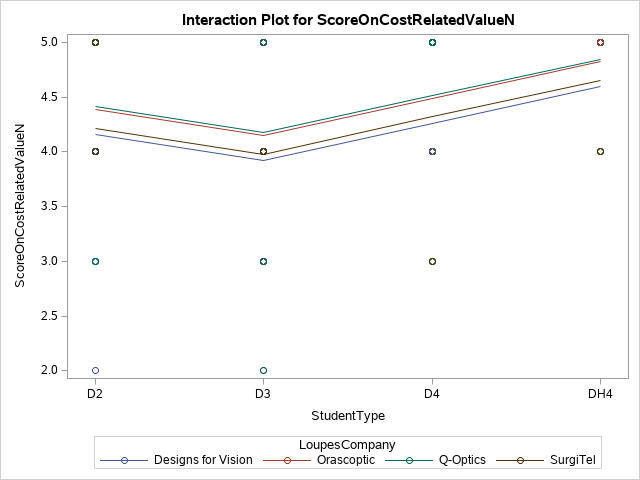
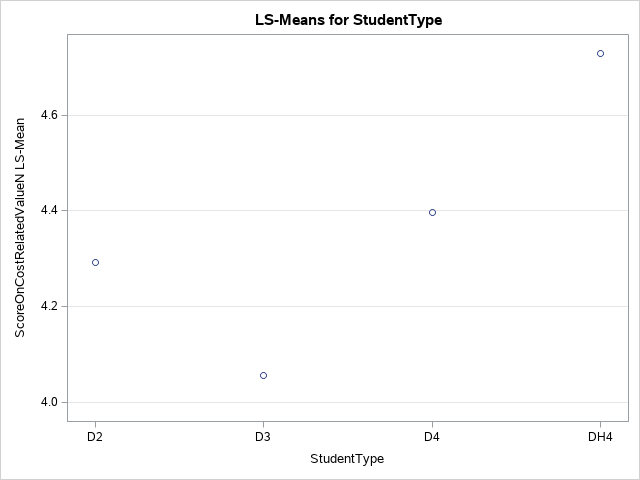
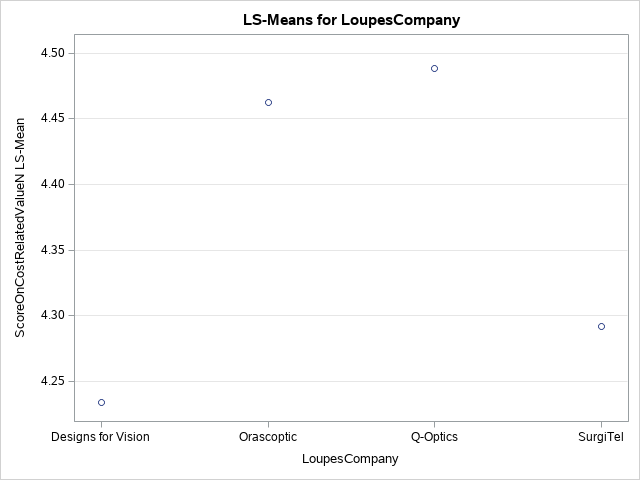
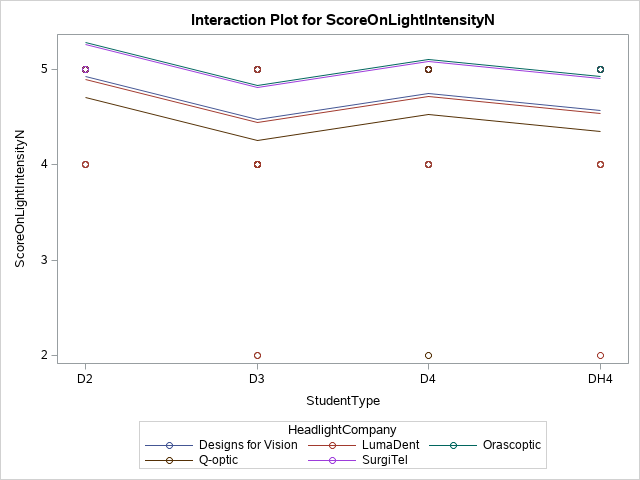
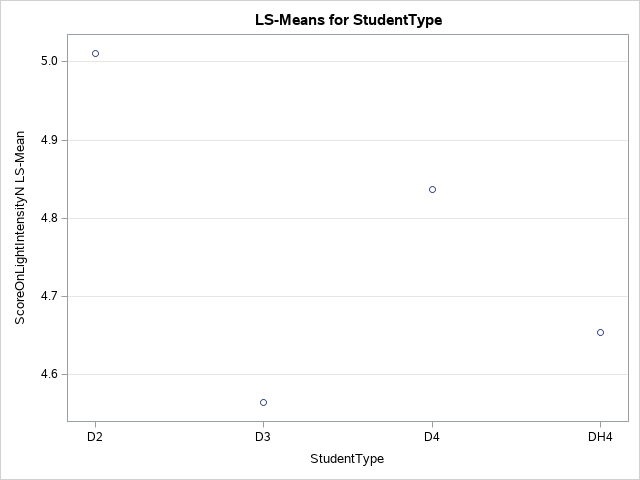
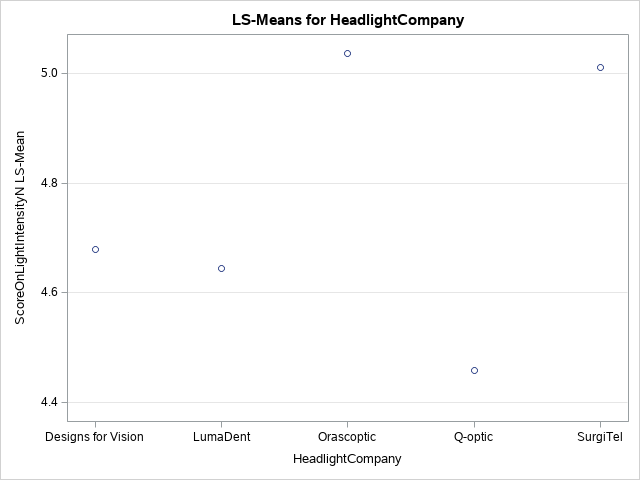
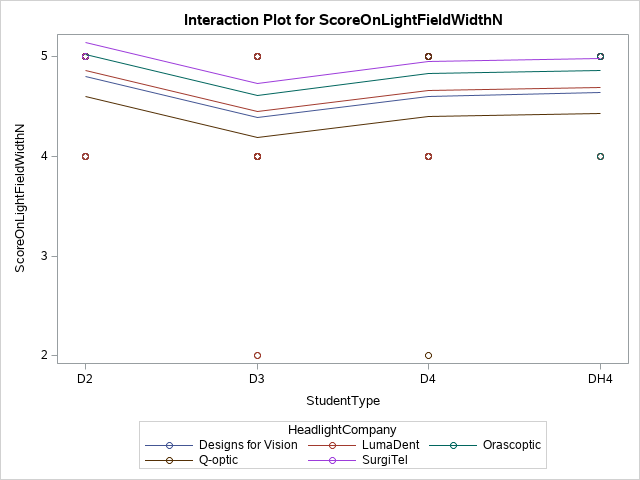
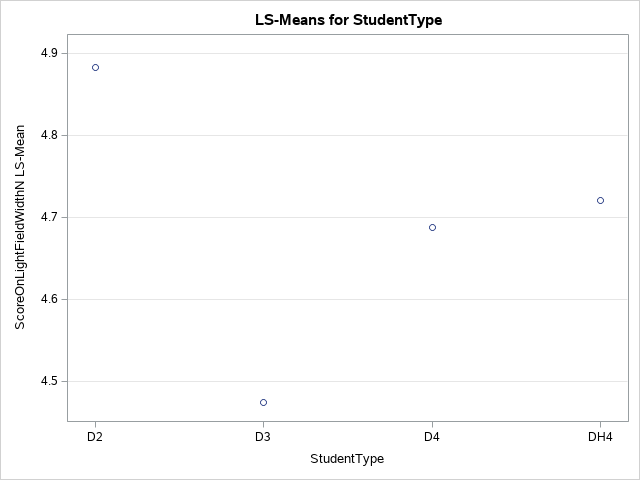
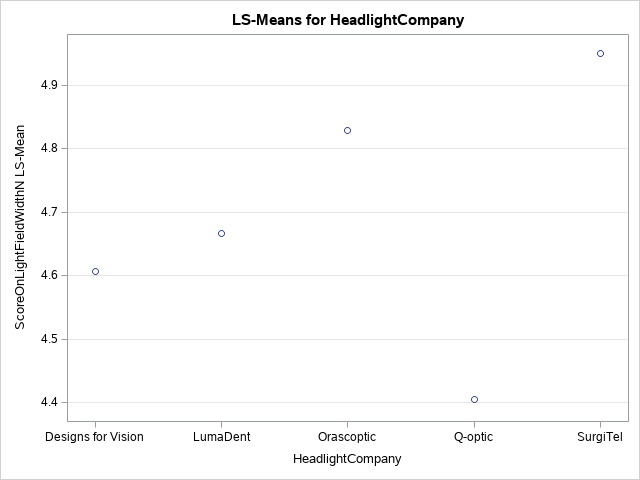
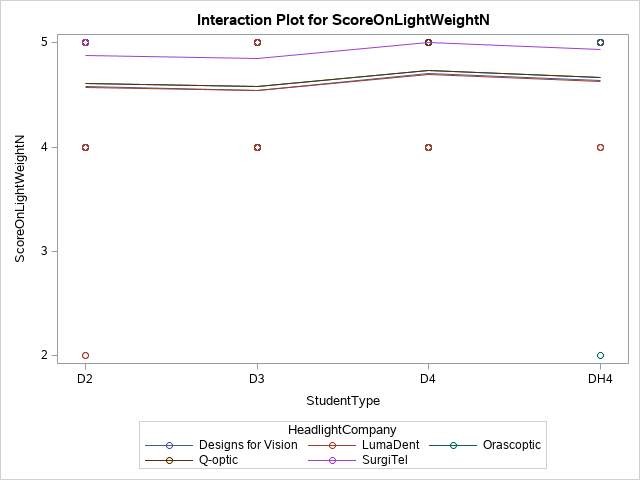
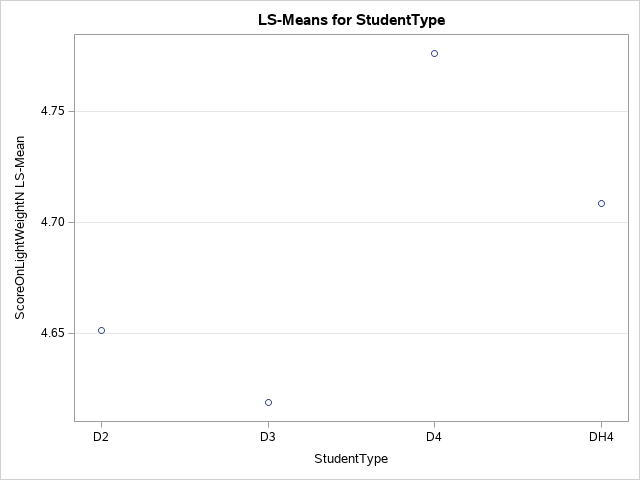
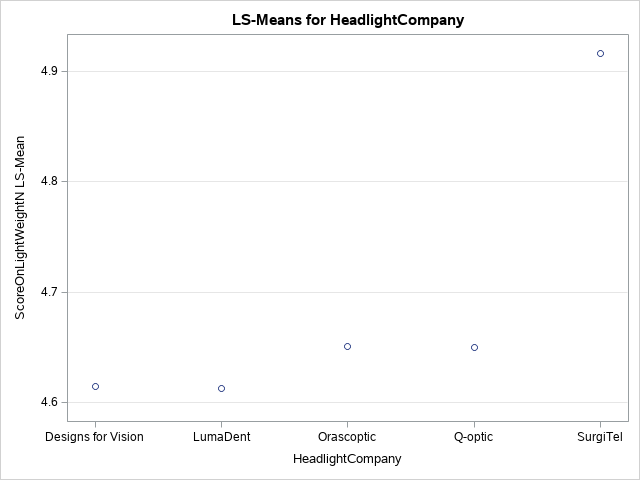
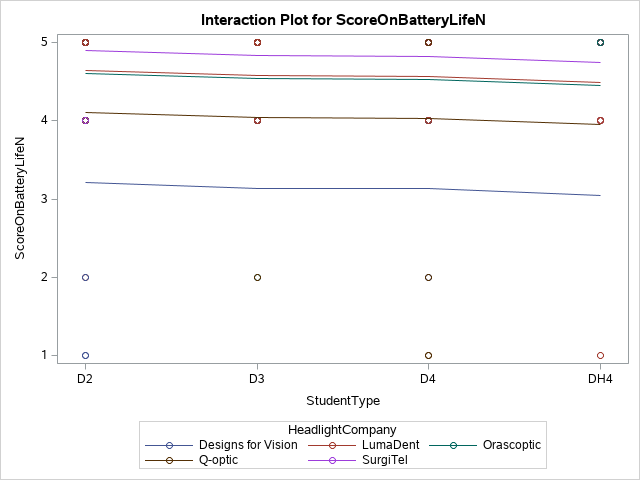
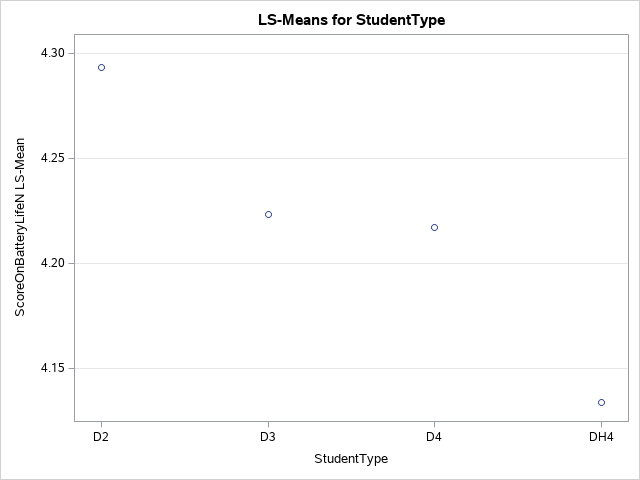
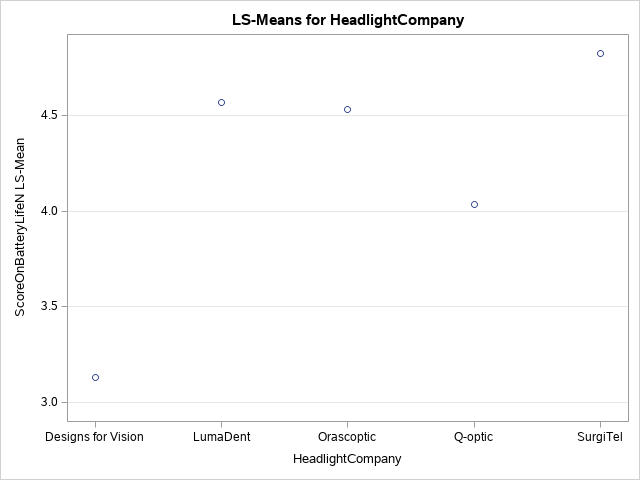
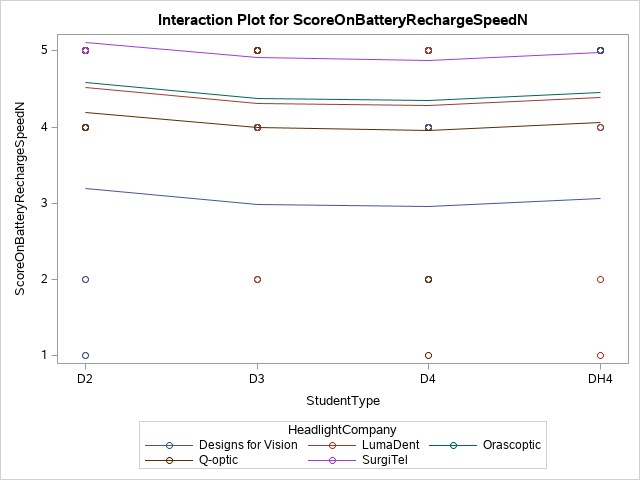
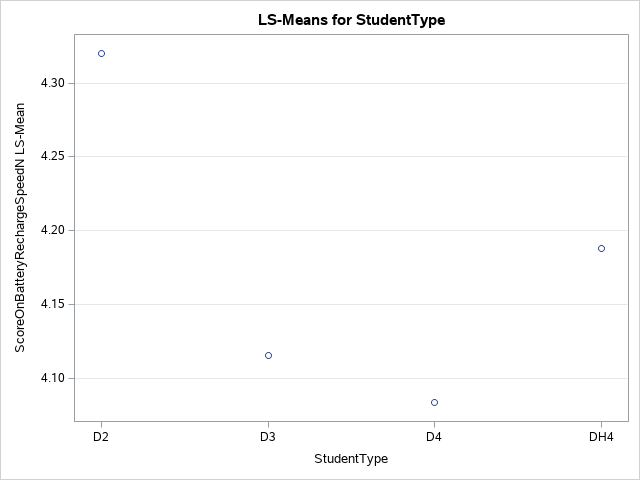
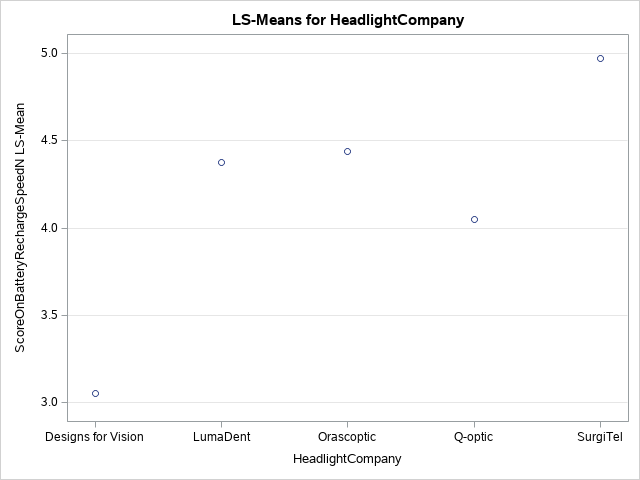
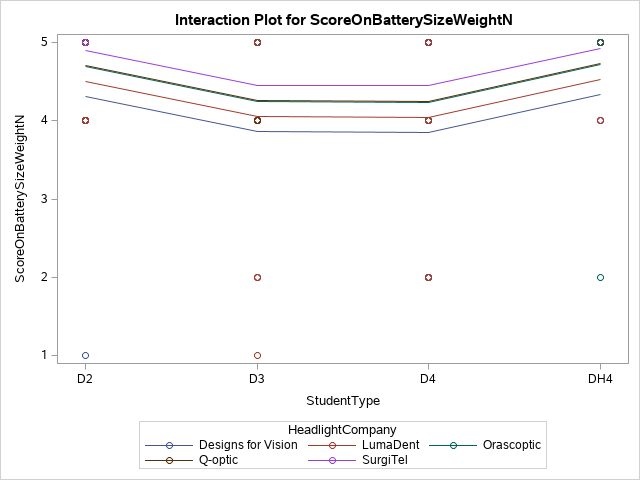
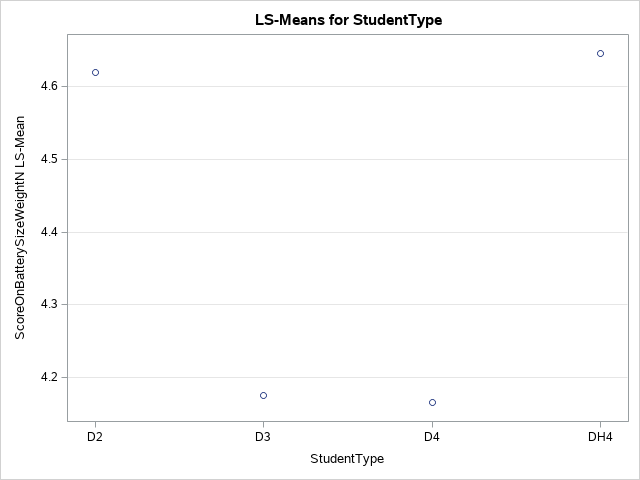
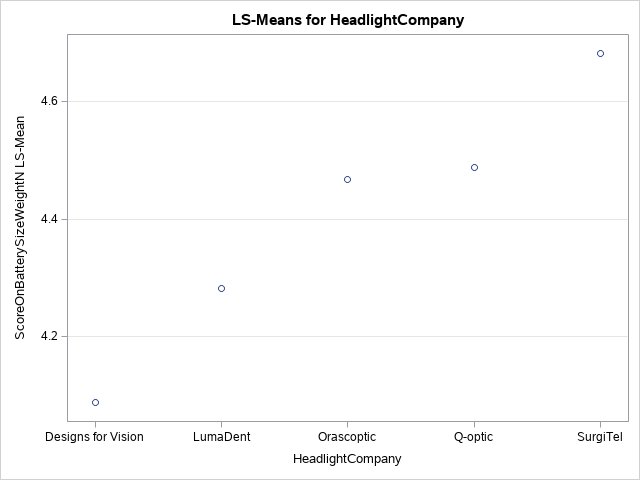
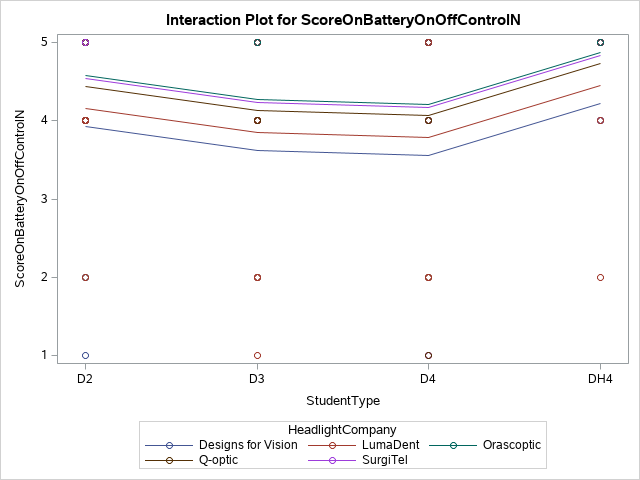
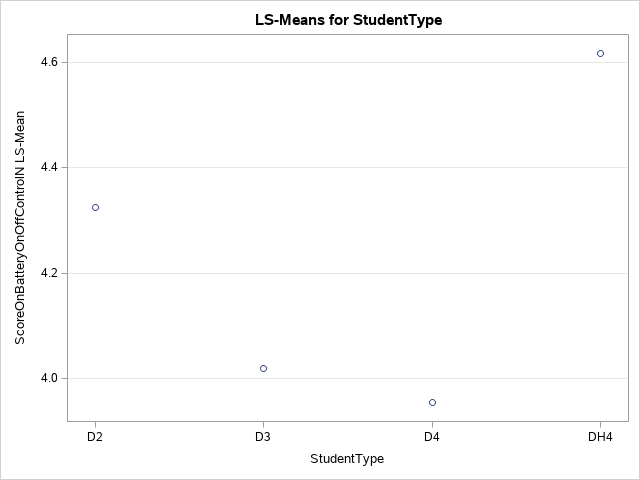
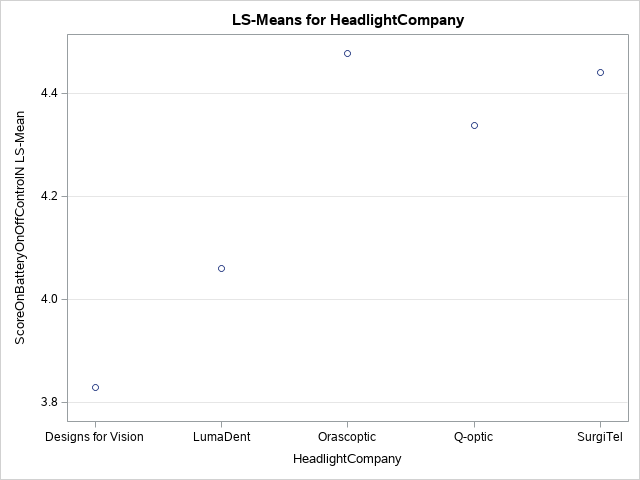

In [34]:
/* 9 satisfaction scores on loupes */
proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnLoupesMagnificationN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType; /* pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany;/* / pdiff=all adjust=tukey;*/
   title 'Effects of Student Types and Companies on Satisfaction Scores';
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnLensQualityN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType; /* / pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany; /* / pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnWidthDepthViewingFieldN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany; /* / pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnComfortN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnLoupesWeightN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnStyleN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnCustomerServiceN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnSalesRepresentativeN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType LoupesCompany;
   model ScoreOnCostRelatedValueN = StudentType LoupesCompany/ ss3;
   lsmeans StudentType / ; /*pdiff=all adjust=tukey;*/
   lsmeans LoupesCompany / ; /*pdiff=all adjust=tukey;*/
run;

/* seven satisfaction scores on headlight */
proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnLightIntensityN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnLightFieldWidthN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnLightWeightN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnBatteryLifeN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnBatteryRechargeSpeedN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnBatterySizeWeightN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

proc glm data = survey2;
   class StudentType HeadlightCompany;
   model ScoreOnBatteryOnOffControlN = StudentType HeadlightCompany/ ss3;
   lsmeans StudentType ; /*/ pdiff=all adjust=tukey;*/
   lsmeans HeadlightCompany ; /*/ pdiff=all adjust=tukey;*/
run;

## Alternative analysis by cumulative logistics models treating satisfaction scores as ordered categorical variables

#### Nine specific satisfacion scores on Loupes with respect to student types and loupes companies.<BR>
We found the corresponding p values are <BR>
(first p value is for Stuent type and the second p value is for company)<br>


GLM:
ScoreOnLoupesMagnification (0.0009, 0.0451); <BR>
ScoreOnLensQuality (0.0607, 0.0439); <BR>
ScoreOnWidthDepthViewingField (0.2114, 0.0061); <BR>
ScoreOnComfort (0.8179, 0.1561); <BR>
ScoreOnLoupesWeight (0.1676, 0.0002); <BR>
ScoreOnStyle (0.0051, 0.1442); <BR>
ScoreOnCustomerService (0.0793, 0.0002); <BR>
ScoreOnSalesRepresentative (0.0135, 0.0001); <BR>
ScoreOnCostRelatedValue (0.0066, 0.3184); <BR>

Cumulative logistics models:<BR>
ScoreOnLoupesMagnification (0.0013, 0.0971); <BR>
ScoreOnLensQuality (0.0257, 0.0814); <BR>
ScoreOnWidthDepthViewingField (0.2325, 0.0287); <BR>
ScoreOnComfort (0.9444, 0.1237); <BR>
ScoreOnLoupesWeight (0.1773, 0.0017); <BR>
ScoreOnStyle (0.0032, 0.3025); <BR>
ScoreOnCustomerService (0.0630, 0.0008); <BR>
ScoreOnSalesRepresentative (0.0155, 0.0001); <BR>
ScoreOnCostRelatedValue (0.0143, 0.1620); <BR>

#### Seven specific satisfacion scores on Headlights with respect to student types and headlight companies simultaneously.<BR>
We found the corresponding p values are: (first p value is for Stuent type and the second p value is for company) <BR>

GLM results: <BR>    
ScoreOnLightIntensity (0.0072, 0.0162) ; <BR>
ScoreOnLightFieldWidth (0.0185, 0.0681); <BR>
ScoreOnLightWeight (0.6837, 0.4750); <BR>
ScoreOnBatteryLife (0.9435, 0.0001);<BR>
ScoreOnBatteryRechargeSpeed (0.7261, 0.0001); <BR>
ScoreOnBatterySizeWeight (0.0681, 0.5109); <BR>
ScoreOnBatteryOnOffControl (0.1742, 0.5826); <BR>
----------------------------------<BR>    
Cumulative Logistics results <BR>
ScoreOnLightIntensity (0.0137, 0.4096) ; <BR>
ScoreOnLightFieldWidth (0.0401, 0.2240); <BR>
ScoreOnLightWeight (0.3452, 0.2906); <BR>
ScoreOnBatteryLife (0.8858, 0.0009);<BR>
ScoreOnBatteryRechargeSpeed (0.5471, 0.0032); <BR>
ScoreOnBatterySizeWeight (0.1097, 0.4955); <BR>
ScoreOnBatteryOnOffControl (0.2740, 0.2249); <BR>
    

In [49]:
proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnLoupesMagnificationN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnLensQualityN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnWidthDepthViewingFieldN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

In [50]:
proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnComfortN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

In [51]:
proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnLoupesWeightN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnStyleN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

In [52]:
proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnCustomerServiceN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;
  
proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnSalesRepresentativeN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType LoupesCompany;
model ScoreOnCostRelatedValueN (order=internal) = StudentType LoupesCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run; 

7 scores

In [48]:
/* 7 scores */
 
proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnLightIntensityN  (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnLightFieldWidthN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

In [47]:
proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnLightWeightN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnBatteryLifeN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run; 

proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnBatteryRechargeSpeedN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;

In [46]:
proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnBatterySizeWeightN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;
  
proc glimmix data=survey2;
class StudentType HeadlightCompany;
model ScoreOnBatteryOnOffControlN (order=internal) = StudentType HeadlightCompany/htype=3 dist=multinomial link=cumlogit s;
title "Effects of Student Types and Company on Satisfaction Scores";
run;